In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

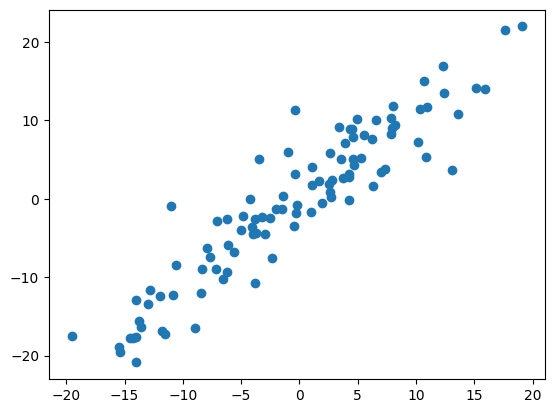

In [2]:
x = torch.randn(100,1)*10
y = x + 3*torch.randn(100,1)
plt.plot(x.numpy(),y.numpy(),'o')
plt.show()

In [3]:
class LinearRegression(nn.Module):

  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self,x):
    return self.linear(x)


In [4]:
torch.manual_seed(1)
model = LinearRegression(1,1)
w,b = model.parameters()

def getParams():
  return (w[0][0].item(),b[0].item())


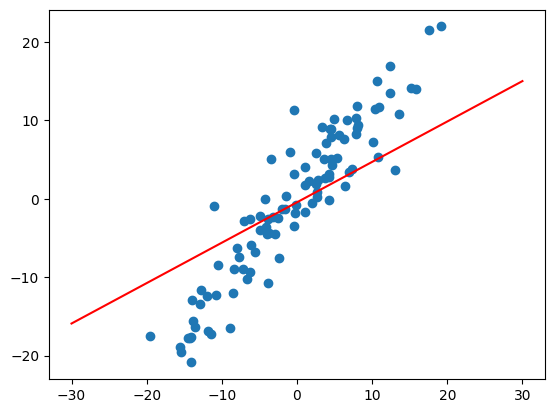

In [5]:
def plotFit(title):
  plt.title = title
  w1, b1 = getParams()
  x1 = np.array([-30,30])
  y1 = w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

plotFit("Initial Model")

In [6]:
criteron = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [7]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criteron(y_pred,y)
  if((i+1)%10==0 or i==0):
    print('Epoch: ',i+1," Loss: ",loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:  1  Loss:  35.46186065673828
Epoch:  10  Loss:  12.951821327209473
Epoch:  20  Loss:  12.889630317687988
Epoch:  30  Loss:  12.848078727722168
Epoch:  40  Loss:  12.820295333862305
Epoch:  50  Loss:  12.801717758178711
Epoch:  60  Loss:  12.789295196533203
Epoch:  70  Loss:  12.780988693237305
Epoch:  80  Loss:  12.775435447692871
Epoch:  90  Loss:  12.771722793579102
Epoch:  100  Loss:  12.76923942565918


Text(0, 0.5, 'Loss')

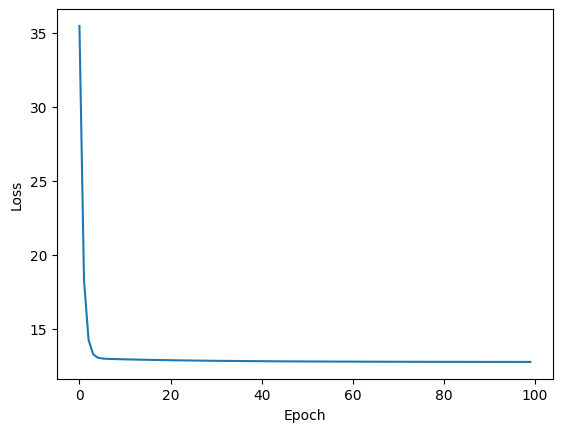

In [8]:
plt.plot(range(epochs),losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

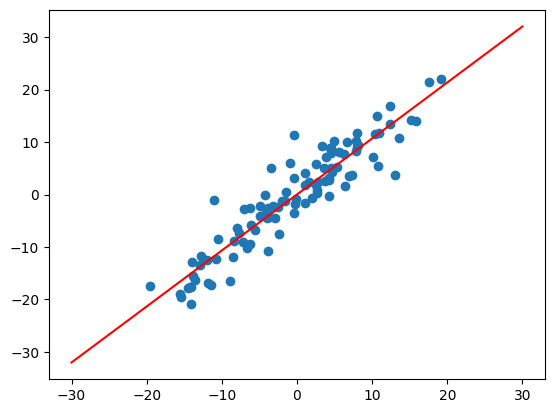

In [9]:
plotFit("Trained Model")